# ELECTRICAL UTILITIES REPORT EXPLORATION #

## Dataset Description ##
The data in the dataset is provided by the Federal Energy Regulatory Commission of the US and it is the fuel quality data of various generating plants. The data reveals granular data on fuel burned, the cost per unit of fuel burned, power plant usage patterns of the years and so on.

### Power Plants ###
Due to the numerous names of different power plants across the location, the power plants are not therefore in the data exploration below categorised based on names of power plants, but rather they are categorised based on their fuel type given in the dataset.

##### The Dataset is called fuel_data #####

In [1]:
# Import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from the url given using pandas
url =  "https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"
fuel_data = pd.read_csv(url)

In [5]:
fuel_data.info() #Getting the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


From the information of the data provided above, we know that the dataset has 11 columns and 29523 rows with float, int and object data types.


In [6]:
print(fuel_data.head()) #printing the first five rows

                record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130             

For easy readability and to further help to easily navigate through the data provided, we will rename the columns of the dataset.


In [7]:
# Renaming the columns for  easy readability
fuel_data = fuel_data.rename(columns = {"utility_id_ferc1": "UtilityID", "report_year": "Year",
                          "plant_name_ferc1": "Plant Name", "fuel_type_code_pudl": "Fuel Type", 
                          "fuel_unit": "Fuel Unit", "fuel_qty_burned": "Burned Fuel Qty",
                          "fuel_mmbtu_per_unit": "Energy per Unit(MMBTU)",
                          "fuel_cost_per_unit_burned": "Fuel Cost per Unit(Burned)",
                          "fuel_cost_per_unit_delivered": "Fuel Cost per Unit(Delivered)",
                          "fuel_cost_per_mmbtu": "Fuel Cost per MMBTU"
                         })
fuel_data.head()

,record_id,UtilityID,Year,Plant Name,Fuel Type,Fuel Unit,Burned Fuel Qty,Energy per Unit(MMBTU),Fuel Cost per Unit(Burned),Fuel Cost per Unit(Delivered),Fuel Cost per MMBTU
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [8]:
# Check for the sum of missing values in each column 
print(fuel_data.isnull().sum())

record_id                          0
UtilityID                          0
Year                               0
Plant Name                         0
Fuel Type                          0
Fuel Unit                        180
Burned Fuel Qty                    0
Energy per Unit(MMBTU)             0
Fuel Cost per Unit(Burned)         0
Fuel Cost per Unit(Delivered)      0
Fuel Cost per MMBTU                0
dtype: int64


In [9]:
# So far the missing datas are few and only can be found in a single column
# We'll drop the missing data rows

# to drop rows with missing values
fuel_data.dropna(axis = 0, inplace = True)
print(fuel_data)

                     record_id  UtilityID  Year            Plant Name  \
0        f1_fuel_1994_12_1_0_7          1  1994              rockport   
1       f1_fuel_1994_12_1_0_10          1  1994  rockport total plant   
2        f1_fuel_1994_12_2_0_1          2  1994                gorgas   
3        f1_fuel_1994_12_2_0_7          2  1994                 barry   
4       f1_fuel_1994_12_2_0_10          2  1994             chickasaw   
...                        ...        ...   ...                   ...   
29518  f1_fuel_2018_12_12_0_13         12  2018    neil simpson ct #1   
29519   f1_fuel_2018_12_12_1_1         12  2018  cheyenne prairie 58%   
29520  f1_fuel_2018_12_12_1_10         12  2018     lange ct facility   
29521  f1_fuel_2018_12_12_1_13         12  2018       wygen 3 bhp 52%   
29522  f1_fuel_2018_12_12_1_14         12  2018       wygen 3 bhp 52%   

      Fuel Type Fuel Unit  Burned Fuel Qty  Energy per Unit(MMBTU)  \
0          coal       ton        5377489.0           

In [10]:
# Check again for sum of missing values
print(fuel_data.isnull().sum())

record_id                        0
UtilityID                        0
Year                             0
Plant Name                       0
Fuel Type                        0
Fuel Unit                        0
Burned Fuel Qty                  0
Energy per Unit(MMBTU)           0
Fuel Cost per Unit(Burned)       0
Fuel Cost per Unit(Delivered)    0
Fuel Cost per MMBTU              0
dtype: int64


In [11]:
# Checking for duplicate rows
print(fuel_data.duplicated().any())


False


In [13]:
fuel_data.shape #shape of the data shows the rows, columns

(29343, 11)

In [14]:
fuel_data.describe()   #to totally describe the dataset statistically

,UtilityID,Year,Burned Fuel Qty,Energy per Unit(MMBTU),Fuel Cost per Unit(Burned),Fuel Cost per Unit(Delivered),Fuel Cost per MMBTU
count,29343.000000,29343.000000,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
mean,118.507037,2005.819105,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,74.241226,7.019855,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,122.000000,2006.000000,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,176.000000,2012.000000,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


## Things to really focus on##
The aim of the dataset is to know the impact of fuel ( using the fuel type) on the climate change due to the usage of fuel to generate electricity over the years. So therefore the following features are to be explored:

#### Power Plant wrt their operating cost ###
#### Impact of Fuel costs to the viability of different generation sources ####
#### Highlight the competitiveness of renewable energy ####
#### Show how general mix of different of different utilities evolved over time (i.e. Utility ID wrt Years) ####
#### Explore quantity of fuel burned over the years (you can relate it to how it affects the global climate condition) (i.e. Burned fuel qty wrt Years) ####
#### Explore Fuel Cost(Total) wrt Year to know the cost of fuel burned over the years####


## Operating Costs of The Power Plants ##
To determine the Operating costs of the plants, we'll do the following:
1. Group the plants together based on their fuel type given in the dataset that is to say we won't use the individual names of the plants as they are numerous, instead we'll say: Oil Plants, Coal Plants, Waste Plants, etc.
2. Know the fuel types
3. Relate the fuel types to relevant features in the dataset
4. Define Operating Cost

NB: The major cost of running any electrical power plant is usually the cost of the fuel required to power the plant which is the total fuel burned cost in order to power the plant. 
Based on the dataset given, we will take the total fuel cost as our operating cost of the plant.

##### Total Fuel Cost of the various plant is considered as the Operating Cost of the Plant ####

In [15]:
# taking a look at the numerous plant name
fuel_data.groupby('Plant Name')['Plant Name'].count()

Plant Name
(1)sta98                1
(2) scriba sta. 99      1
(n) contra costa        1
(n) pittsburg           1
(n)(t)moss landing      1
                       ..
zimmer- aepgr share     2
zion                    3
zorn                   12
zorn ct                10
zuni                   16
Name: Plant Name, Length: 2307, dtype: int64

The total number of various plant name is 2,307. This is so numerous and cannot be easily used to explore our data set, so we'll consider using the fuel type as a means of exploring our data set.

In [17]:
# Knowing the various fuel types in the dataset

fuel_data.groupby('Fuel Type')['Fuel Type'].count()

Fuel Type
coal        8496
gas        11433
nuclear      803
oil         8043
other        131
waste        437
Name: Fuel Type, dtype: int64

We have six categories of fuel type namely: Coal, Gas, Nuclear, Oil, Others and Waste.
We'll make use of this fuel type and thus knowing that our various plant will be referred to as Coal Plants, Gas Plants, Nuclear Plants, Oil Plants, Others Plant and Waste Plants.

### Operating Cost also known as Fuel Cost(Total) ###
Since our fuel cost(Total) is used as our operating cost.
##### Fuel Cost(Total) = Burned Fuel Qty * Fuel Cost per Unit(Burned) #####
We'll relate our Fuel Cost(Total) with respect to the Fuel type which is used as our means of categorising our various power plant in order to:
#### Relate the Power Plants wrt Operating Cost/Fuel Cost(Total)####
#### Know the impact of Fuel Cost(Total) on the viability of various generating sources ####

### Fuel Cost(Total) is added to our dataset as a new feature ###


AxesSubplot(0.125,0.125;0.775x0.755)


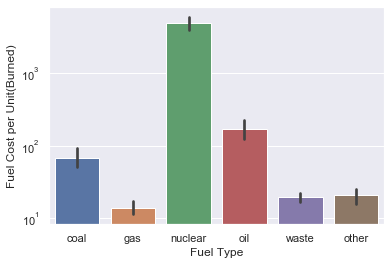

In [19]:
# Comparing Fuel Cost per Unit(Burned) with respect to Fuel Type
# Using a Bar Chart
sns.set(style = "darkgrid")
ax = sns.barplot(x = "Fuel Type", y = "Fuel Cost per Unit(Burned)", data = fuel_data)
ax.set_yscale("log")
print(ax)


From the above bar chat we can clearly see that fuel cost per unit burned for each of the plant varies, and the nuclear plants has the highest value followed by the oil plant, then the coal, other, waste and gas in descending order.
Next we'll compare the amount of fuel burned i.e. Burned Fuel Qty.


AxesSubplot(0.125,0.125;0.775x0.755)


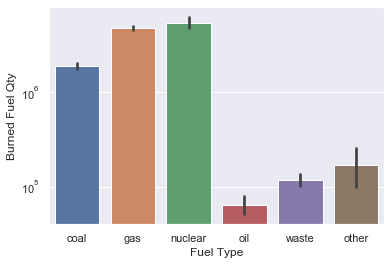

In [21]:
# Comparing Burned Fuel Qty with respect to the Fuel Type
# Using a bar chart
sns.set(style = "darkgrid")
bx = sns.barplot(x = "Fuel Type", y = "Burned Fuel Qty", data = fuel_data)
bx.set_yscale("log")
print(bx)

From this bar chart, we can see that  the amount of fuel burned for nuclear is still the  highest followed by gas, coal, other, waste and oil respectively. 
We'll find the total fuel cost for each plant in the next cell.


In [23]:
# Multiply the Burned Fuel Qty with the Fuel Cost per Unit(Burned)
# Assign this product to a new column called Fuel Cost

fuel_data["Fuel Cost(Total)"] = fuel_data["Burned Fuel Qty"] * fuel_data["Fuel Cost per Unit(Burned)"]
fuel_data.head(3)

,record_id,UtilityID,Year,Plant Name,Fuel Type,Fuel Unit,Burned Fuel Qty,Energy per Unit(MMBTU),Fuel Cost per Unit(Burned),Fuel Cost per Unit(Delivered),Fuel Cost per MMBTU,Fuel Cost(Total)
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08


AxesSubplot(0.125,0.125;0.775x0.755)


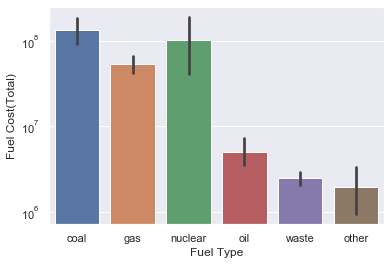

In [25]:
# Compare the Fuel Cost(Total) with the Generating plant based on their Fuel Type
%matplotlib inline
sns.set(style = "darkgrid")
cx = sns.barplot(x = "Fuel Type", y = "Fuel Cost(Total)", data = fuel_data)
cx.set_yscale("log")
print(cx)

###### From the chart above we list plants based on their Fuel Cost(Total) which is their operating cost in descending order:######

1. COAL PLANTS
2. NUCLEAR PLANTS
3. GAS PLANTS
4. OIL PLANTS
5. WASTE PLANTS
6. OTHER PLANTS

Due to the fact that the cost of running the coal, nuclear and gas plants are enormous, and due to their negative impact on the climate change based on emissions from greenhouse gases, these plants are not seemingly viable.

AxesSubplot(0.125,0.125;0.775x0.755)


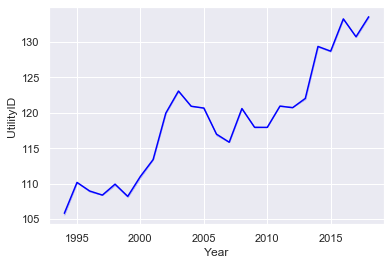

In [26]:
# To Show how general mix of different of different utilities evolved over time 
# (i.e. Utility ID wrt Years)
# We'll plot a line graph to see how the general utility fairs over the years
# We'll make use of the utility ID
dx = sns.lineplot(x = "Year", y = "UtilityID", ci = 0, color = "blue", data = fuel_data)
print(dx)

From the above, we can see that over the years, there has been a rise in the utility of plants based on their various utility identity.

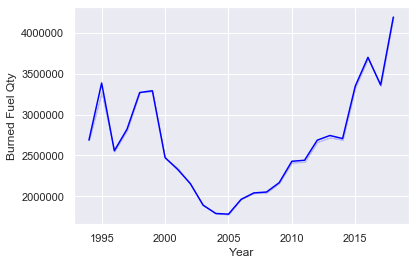

In [27]:
# To show Burned Fuel Qty over the years
ex = sns.lineplot(x = "Year", y = "Burned Fuel Qty", ci = 0, color = "blue", data = fuel_data)

From the above graph we can see that there was a drop in the amount of Burned Fuel Qty between the years 2000 to 2015. And an increase came in the amount subsequently.

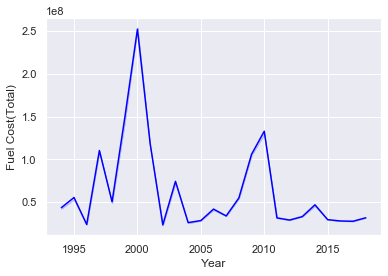

In [29]:
# Comparison of Fuel Cost(Total) over the years.
fx = sns.lineplot(x = "Year", y = "Fuel Cost(Total)", ci = 0, color = "blue", data = fuel_data)

The Fuel Cost(Total) spiked around the years 2000, and 2010, then slide down in later years